In [1]:
!pip install face_recognition

import os
import glob
import face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=b4fec36bd212d8ae1992231439d6c4f724778e878e1c2815c3a3696946bf2c1e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

In [3]:
pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=508938207635013fe31e0c41de9dcee1becf60a39b7d4f249caec34b248135a4
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [4]:
import os
import glob
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from deepface import DeepFace

24-09-10 20:55:20 - Directory /root/.deepface has been created
24-09-10 20:55:20 - Directory /root/.deepface/weights has been created


In [5]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

# Extract the file
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2024-09-10 20:55:22--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  37.5MB/s    in 1.6s    

2024-09-10 20:55:24 (37.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



Please upload the images for training:


Saving mazen2.jpg to mazen2.jpg
24-09-10 20:56:22 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:07<00:00, 78.2MB/s]


24-09-10 20:56:40 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 220MB/s]


Image mazen2.jpg added to training data successfully.
Please upload the image you want to test:


Saving mazen.jpg to mazen.jpg
Similarity with mazen2: 0.8768307918222321
Matched with: mazen2


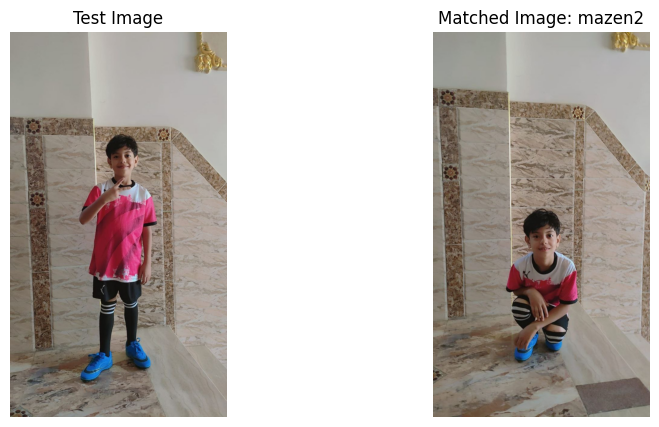

('mazen2', True)


In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import dlib
from google.colab import files
from deepface import DeepFace

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Align the face using dlib landmarks detection
def align_face(image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download required

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)

    if len(rects) > 0:
        rect = rects[0]
        shape = predictor(gray, rect)
        aligned_face = dlib.get_face_chip(img, shape)  # Align face using landmarks
        return aligned_face
    else:
        return img  # Return original if no face is found

# Preprocess image: alignment, resizing, grayscale, and normalization
def preprocess_image(image_path):
    aligned_img = align_face(image_path)

    # Check if the image has 3 channels (RGB)
    if len(aligned_img.shape) != 3 or aligned_img.shape[2] != 3:
        aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2RGB)

    # Convert to grayscale
    gray_img = cv2.cvtColor(np.array(aligned_img), cv2.COLOR_RGB2GRAY)

    # Resize to 224x224
    resized_img = cv2.resize(gray_img, (224, 224))

    # Histogram equalization
    equalized_img = cv2.equalizeHist(resized_img)

    # Normalize the pixel values to [0, 1]
    normalized_img = equalized_img / 255.0

    return normalized_img

# Function to display the training and test image side by side
def display_images(test_image_path, matched_image_path, name, similarity):
    test_img = Image.open(test_image_path)
    matched_img = Image.open(matched_image_path + ".jpg")  # Ensure the extension is included

    # Display the images side by side using matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(test_img)
    axes[0].set_title("Test Image")
    axes[0].axis('off')

    axes[1].imshow(matched_img)
    axes[1].set_title(f"Matched Image: {name}")
    axes[1].axis('off')

    plt.show()

# Facial search function
def facial_search(image_to_test, known_faces, known_face_names, models=['VGG-Face', 'Facenet']):
    name = None
    status = False

    # Preprocess the test image
    preprocessed_test_image = preprocess_image(image_to_test)

    # Analyze test image with models
    test_image_analyses = []
    for model in models:
        embedding = DeepFace.represent(img_path=image_to_test, model_name=model, enforce_detection=False)[0]['embedding']
        test_image_analyses.append(embedding)

    # Find best match using cosine similarity
    max_similarity = -1  # Set initial value
    matched_image_path = None
    for i, known_face_embeddings in enumerate(known_faces):
        # Compare with known faces for each model
        similarities = [cosine_similarity(test_image_analysis, known_face_embedding)
                        for test_image_analysis, known_face_embedding in zip(test_image_analyses, known_face_embeddings)]
        avg_similarity = np.mean(similarities)

        # Print similarity scores
        print(f"Similarity with {known_face_names[i]}: {avg_similarity}")

        # Look for highest similarity (greater than 0.7)
        if avg_similarity > 0.7 and avg_similarity > max_similarity:
            max_similarity = avg_similarity
            name = known_face_names[i]
            matched_image_path = os.path.join('/content/', known_face_names[i])  # Include full path
            status = True

    if name:
        print(f"Matched with: {name}")
        display_images(image_to_test, matched_image_path, name, max_similarity)  # Display images side by side
    else:
        print("No match found with the specified threshold.")

    return name, status

# Function to add a new image to the training data
def add_to_training(image_path, known_faces, known_face_names):
    """ Add a new image to the training data """
    # Process and analyze the image
    child_id = image_path.split(".")[0]  # Use file name (without extension) as ID
    known_face_names.append(child_id)

    # Preprocess and analyze the image
    preprocessed_known_image = preprocess_image(image_path)
    embeddings = []
    for model in ['VGG-Face', 'Facenet']:
        embedding = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=False)[0]['embedding']
        embeddings.append(embedding)

    known_faces.append(embeddings)

    # Save updated embeddings and face names
    np.save('known_faces.npy', np.array(known_faces, dtype=object), allow_pickle=True)
    np.save('known_face_names.npy', known_face_names, allow_pickle=True)

    print(f"Image {image_path} added to training data successfully.")

if __name__ == '__main__':
    # Step 1: Load saved embeddings and face names
    try:
        known_faces = np.load('known_faces.npy', allow_pickle=True)
        known_face_names = np.load('known_face_names.npy', allow_pickle=True)
    except FileNotFoundError:
        known_faces = []
        known_face_names = []

    # Step 2: Upload new images for training
    print("Please upload the images for training:")
    uploaded_training = files.upload()

    for filename in uploaded_training.keys():
        add_to_training(filename, known_faces, known_face_names)

    # Step 3: Upload image for testing
    print("Please upload the image you want to test:")
    uploaded_test = files.upload()

    # Process test images one by one
    for test_filename in uploaded_test.keys():
        print(facial_search(test_filename, known_faces, known_face_names, models=['VGG-Face', 'Facenet']))


In [10]:
import os
import shutil

# Function to add a new image to the training data and save it in the "images" folder
# Function to add a new image to the training data and save it in the "images" folder
def add_to_training(image_path, known_faces, known_face_names):
    """ Add a new image to the training data and save it in 'images' folder """

    # Ensure the 'images' folder exists
    if not os.path.exists('images'):
        os.makedirs('images')

    # Save the image to the 'images' folder
    image_destination = os.path.join('images', os.path.basename(image_path))
    shutil.move(image_path, image_destination)

    # Extract the image name (without extension) as the unique ID
    child_id = os.path.splitext(os.path.basename(image_path))[0]

    # Convert NumPy array to list
    known_face_names = list(known_face_names)

    known_face_names.append(child_id)

    # Preprocess and analyze the image
    preprocessed_known_image = preprocess_image(image_destination)
    embeddings = []
    for model in ['VGG-Face', 'Facenet']:
        embedding = DeepFace.represent(img_path=image_destination, model_name=model, enforce_detection=False)[0]['embedding']
        embeddings.append(embedding)

    known_faces.append(embeddings)

    # Save updated embeddings and face names
    np.save('known_faces.npy', np.array(known_faces, dtype=object), allow_pickle=True)
    np.save('known_face_names.npy', known_face_names, allow_pickle=True)

    print(f"Image {image_path} added to training data successfully.")

In [8]:
# Facial search function
def facial_search(image_to_test, known_faces, known_face_names, models=['VGG-Face', 'Facenet']):
    name = None
    status = False

    # Preprocess the test image
    preprocessed_test_image = preprocess_image(image_to_test)

    # Analyze test image with models
    test_image_analyses = []
    for model in models:
        embedding = DeepFace.represent(img_path=image_to_test, model_name=model, enforce_detection=False)[0]['embedding']
        test_image_analyses.append(embedding)

    # Find best match using cosine similarity
    max_similarity = -1  # Set initial value
    matched_image_path = None
    for i, known_face_embeddings in enumerate(known_faces):
        # Compare with known faces for each model
        similarities = [cosine_similarity(test_image_analysis, known_face_embedding)
                        for test_image_analysis, known_face_embedding in zip(test_image_analyses, known_face_embeddings)]
        avg_similarity = np.mean(similarities)

        # Print similarity scores
        print(f"Similarity with {known_face_names[i]}: {avg_similarity}")

        # Look for highest similarity (greater than 0.7)
        if avg_similarity > 0.7 and avg_similarity > max_similarity:
            max_similarity = avg_similarity
            name = known_face_names[i]
            matched_image_path = os.path.join('images', known_face_names[i])  # Update path to "images" folder
            status = True

    if name:
        print(f"Matched with: {name}")
        display_images(image_to_test, matched_image_path, name, max_similarity)  # Display images side by side
    else:
        print("No match found with the specified threshold.")

    return name, status


Please upload the image you want to test:


Saving nour.jpg to nour.jpg
Similarity with mezo.jpg: 0.20489602047706473
Similarity with nourhan.jpg: 0.751842021742177
Similarity with mazen2 (3).jpg: 0.2650843033196208
Matched with: nourhan.jpg


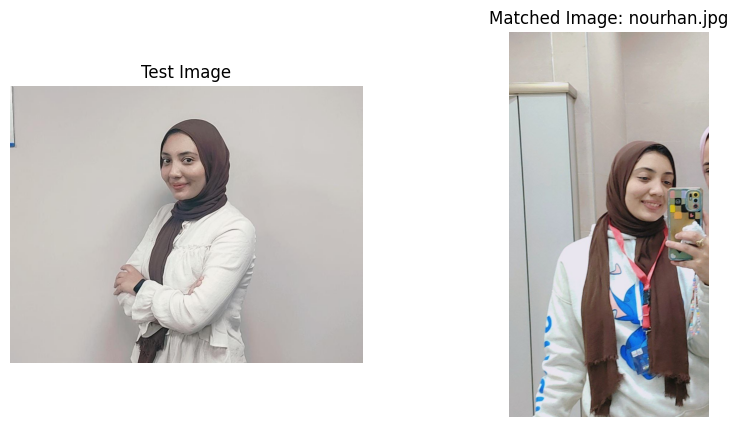

('nourhan.jpg', True)


In [23]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import dlib
from google.colab import files
from deepface import DeepFace
import shutil  # For moving files

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Align the face using dlib landmarks detection
def align_face(image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download required

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)

    if len(rects) > 0:
        rect = rects[0]
        shape = predictor(gray, rect)
        aligned_face = dlib.get_face_chip(img, shape)  # Align face using landmarks
        return aligned_face
    else:
        return img  # Return original if no face is found

# Preprocess image: alignment, resizing, grayscale, and normalization
def preprocess_image(image_path):
    aligned_img = align_face(image_path)

    # Check if the image has 3 channels (RGB)
    if len(aligned_img.shape) != 3 or aligned_img.shape[2] != 3:
        aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2RGB)

    # Convert to grayscale
    gray_img = cv2.cvtColor(np.array(aligned_img), cv2.COLOR_RGB2GRAY)

    # Resize to 224x224
    resized_img = cv2.resize(gray_img, (224, 224))

    # Histogram equalization
    equalized_img = cv2.equalizeHist(resized_img)

    # Normalize the pixel values to [0, 1]
    normalized_img = equalized_img / 255.0

    return normalized_img

# Function to display the training and test image side by side
def display_images(test_image_path, matched_image_path, name, similarity):
    test_img = Image.open(test_image_path)

    # Open the matched image directly using the provided path
    matched_img = Image.open(matched_image_path)

    # Display the images side by side using matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(test_img)
    axes[0].set_title("Test Image")
    axes[0].axis('off')

    axes[1].imshow(matched_img)
    axes[1].set_title(f"Matched Image: {name}")
    axes[1].axis('off')

    plt.show()

# Facial search function to compare with images in the "images" folder
def facial_search(image_to_test, models=['VGG-Face', 'Facenet']):
    name = None
    status = False

    # Preprocess the test image
    preprocessed_test_image = preprocess_image(image_to_test)

    # Analyze test image with models
    test_image_analyses = []
    for model in models:
        embedding = DeepFace.represent(img_path=image_to_test, model_name=model, enforce_detection=False)[0]['embedding']
        test_image_analyses.append(embedding)

    # Set thresholds for different models
    thresholds = {'VGG-Face': 0.7, 'Facenet': 0.85}

    # Load all images from the "images" folder
    image_folder = '/content/images/'
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

    max_similarity = -1  # Set initial value
    matched_image_path = None

    # Loop through all images in the folder and compare
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)

        # Analyze the training image
        known_face_embeddings = []
        for model in models:
            embedding = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=False)[0]['embedding']
            known_face_embeddings.append(embedding)

        # Calculate similarity
        similarities = [cosine_similarity(test_image_analysis, known_face_embedding)
                        for test_image_analysis, known_face_embedding in zip(test_image_analyses, known_face_embeddings)]
        avg_similarity = np.mean(similarities)

        # Print similarity scores
        print(f"Similarity with {image_file}: {avg_similarity}")

        model_threshold = thresholds[models[0]]  # Use threshold of the first model for now
        if avg_similarity > model_threshold and avg_similarity > max_similarity:
            max_similarity = avg_similarity
            name = image_file
            matched_image_path = image_path
            status = True

    if name:
        print(f"Matched with: {name}")
        display_images(image_to_test, matched_image_path, name, max_similarity)  # Display images side by side
    else:
        print("No match found. Adding the image to the training set.")
        add_to_training(image_to_test)

    return name, status

# Function to add a new image to the training data and save it in /content/images
def add_to_training(image_path):
    """ Add a new image to the training data """
    # Move the uploaded image to the "/content/images/" folder
    image_folder = '/content/images/'
    if not os.path.exists(image_folder):
        os.makedirs(image_folder)  # Create folder if it doesn't exist
    destination = os.path.join(image_folder, os.path.basename(image_path))
    shutil.move(image_path, destination)

    print(f"Image {image_path} added to training data successfully and moved to {destination}.")

if __name__ == '__main__':
    # Step 1: Upload image for testing
    print("Please upload the image you want to test:")
    uploaded_test = files.upload()

    # Process test images one by one
    for test_filename in uploaded_test.keys():
        print(facial_search(test_filename, models=['VGG-Face', 'Facenet']))


In [24]:
!pip install Flask deepface dlib numpy opencv-python-headless


In [32]:
from google.colab import output # Import the output module from google.colab
print("Click on the URL below to open the notebook in Colab:")
print(output.eval_js('google.colab.kernel.proxyPort(5000)')) # Use output.eval_js to call the function

Click on the URL below to open the notebook in Colab:
https://bxbefd5g21s-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [33]:
import os
import numpy as np
from flask import Flask, request, jsonify
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import dlib
from deepface import DeepFace
import shutil  # For moving files

app = Flask(__name__)

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Align the face using dlib landmarks detection
def align_face(image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download required

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)

    if len(rects) > 0:
        rect = rects[0]
        shape = predictor(gray, rect)
        aligned_face = dlib.get_face_chip(img, shape)  # Align face using landmarks
        return aligned_face
    else:
        return img  # Return original if no face is found

# Preprocess image: alignment, resizing, grayscale, and normalization
def preprocess_image(image_path):
    aligned_img = align_face(image_path)

    # Check if the image has 3 channels (RGB)
    if len(aligned_img.shape) != 3 or aligned_img.shape[2] != 3:
        aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2RGB)

    # Convert to grayscale
    gray_img = cv2.cvtColor(np.array(aligned_img), cv2.COLOR_RGB2GRAY)

    # Resize to 224x224
    resized_img = cv2.resize(gray_img, (224, 224))

    # Histogram equalization
    equalized_img = cv2.equalizeHist(resized_img)

    # Normalize the pixel values to [0, 1]
    normalized_img = equalized_img / 255.0

    return normalized_img

# Facial search function to compare with images in the "images" folder
def facial_search(image_to_test, models=['VGG-Face', 'Facenet']):
    name = None
    status = False

    # Preprocess the test image
    preprocessed_test_image = preprocess_image(image_to_test)

    # Analyze test image with models
    test_image_analyses = []
    for model in models:
        embedding = DeepFace.represent(img_path=image_to_test, model_name=model, enforce_detection=False)[0]['embedding']
        test_image_analyses.append(embedding)

    # Set thresholds for different models
    thresholds = {'VGG-Face': 0.7, 'Facenet': 0.85}

    # Load all images from the "images" folder
    image_folder = './images/'
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

    max_similarity = -1  # Set initial value
    matched_image_path = None

    # Loop through all images in the folder and compare
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)

        # Analyze the training image
        known_face_embeddings = []
        for model in models:
            embedding = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=False)[0]['embedding']
            known_face_embeddings.append(embedding)

        # Calculate similarity
        similarities = [cosine_similarity(test_image_analysis, known_face_embedding)
                        for test_image_analysis, known_face_embedding in zip(test_image_analyses, known_face_embeddings)]
        avg_similarity = np.mean(similarities)

        # Print similarity scores
        print(f"Similarity with {image_file}: {avg_similarity}")

        model_threshold = thresholds[models[0]]  # Use threshold of the first model for now
        if avg_similarity > model_threshold and avg_similarity > max_similarity:
            max_similarity = avg_similarity
            name = image_file
            matched_image_path = image_path
            status = True

    if name:
        print(f"Matched with: {name}")
        return {'status': 'matched', 'name': name, 'similarity': max_similarity}
    else:
        print("No match found.")
        return {'status': 'no_match'}

# Function to add a new image to the training data and save it in /images
def add_to_training(image_path):
    """ Add a new image to the training data """
    # Move the uploaded image to the "/images/" folder
    image_folder = './images/'
    if not os.path.exists(image_folder):
        os.makedirs(image_folder)  # Create folder if it doesn't exist
    destination = os.path.join(image_folder, os.path.basename(image_path))
    shutil.move(image_path, destination)

    print(f"Image {image_path} added to training data successfully and moved to {destination}.")
    return destination

# API route for facial search
@app.route('/facial_search', methods=['POST'])
def api_facial_search():
    # Get the uploaded file
    if 'image' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400
    file = request.files['image']

    # Save the uploaded file
    file_path = os.path.join('./uploads', file.filename)
    file.save(file_path)

    # Perform facial search
    result = facial_search(file_path)

    return jsonify(result)

# API route to add image to training
@app.route('/add_to_training', methods=['POST'])
def api_add_to_training():
    # Get the uploaded file
    if 'image' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400
    file = request.files['image']

    # Save the uploaded file
    file_path = os.path.join('./uploads', file.filename)
    file.save(file_path)

    # Add the image to the training data
    add_to_training(file_path)

    return jsonify({'status': 'Image added to training'})

if __name__ == '__main__':
    # Create required directories if they don't exist
    if not os.path.exists('./images'):
        os.makedirs('./images')
    if not os.path.exists('./uploads'):
        os.makedirs('./uploads')

    # Run Flask app
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [34]:
!pip install flask ngrok opencv-python-headless dlib deepface pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.2 MB/s eta 0:00:00


In [36]:
!pip install flask-ngrok # Install the correct package 'flask-ngrok'

In [37]:
import os
import numpy as np
from flask import Flask, request, jsonify
from PIL import Image
import cv2
import dlib
from deepface import DeepFace
import shutil
from flask_ngrok import run_with_ngrok  # Add this import

app = Flask(__name__)
run_with_ngrok(app)  # This will automatically use ngrok to create a public URL

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Align the face using dlib landmarks detection
def align_face(image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Ensure this file is present

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)

    if len(rects) > 0:
        rect = rects[0]
        shape = predictor(gray, rect)
        aligned_face = dlib.get_face_chip(img, shape)  # Align face using landmarks
        return aligned_face
    else:
        return img  # Return original if no face is found

# Preprocess image: alignment, resizing, grayscale, and normalization
def preprocess_image(image_path):
    aligned_img = align_face(image_path)

    # Check if the image has 3 channels (RGB)
    if len(aligned_img.shape) != 3 or aligned_img.shape[2] != 3:
        aligned_img = cv2.cvtColor(aligned_img, cv2.COLOR_GRAY2RGB)

    # Convert to grayscale
    gray_img = cv2.cvtColor(np.array(aligned_img), cv2.COLOR_RGB2GRAY)

    # Resize to 224x224
    resized_img = cv2.resize(gray_img, (224, 224))

    # Histogram equalization
    equalized_img = cv2.equalizeHist(resized_img)

    # Normalize the pixel values to [0, 1]
    normalized_img = equalized_img / 255.0

    return normalized_img

# Facial search function to compare with images in the "images" folder
def facial_search(image_to_test, models=['VGG-Face', 'Facenet']):
    name = None
    status = False

    # Preprocess the test image
    preprocessed_test_image = preprocess_image(image_to_test)

    # Analyze test image with models
    test_image_analyses = []
    for model in models:
        embedding = DeepFace.represent(img_path=image_to_test, model_name=model, enforce_detection=False)[0]['embedding']
        test_image_analyses.append(embedding)

    # Set thresholds for different models
    thresholds = {'VGG-Face': 0.7, 'Facenet': 0.85}

    # Load all images from the "images" folder
    image_folder = './images/'
    if not os.path.exists(image_folder):
        return {'status': 'error', 'message': 'Image folder does not exist'}

    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

    max_similarity = -1  # Set initial value
    matched_image_path = None

    # Loop through all images in the folder and compare
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)

        # Analyze the training image
        known_face_embeddings = []
        for model in models:
            embedding = DeepFace.represent(img_path=image_path, model_name=model, enforce_detection=False)[0]['embedding']
            known_face_embeddings.append(embedding)

        # Calculate similarity
        similarities = [cosine_similarity(test_image_analysis, known_face_embedding)
                        for test_image_analysis, known_face_embedding in zip(test_image_analyses, known_face_embeddings)]
        avg_similarity = np.mean(similarities)

        # Print similarity scores
        print(f"Similarity with {image_file}: {avg_similarity}")

        model_threshold = thresholds[models[0]]  # Use threshold of the first model for now
        if avg_similarity > model_threshold and avg_similarity > max_similarity:
            max_similarity = avg_similarity
            name = image_file
            matched_image_path = image_path
            status = True

    if name:
        print(f"Matched with: {name}")
        return {'status': 'matched', 'name': name, 'similarity': max_similarity}
    else:
        print("No match found.")
        return {'status': 'no_match'}

# Function to add a new image to the training data and save it in /images
def add_to_training(image_path):
    """ Add a new image to the training data """
    image_folder = './images/'
    if not os.path.exists(image_folder):
        os.makedirs(image_folder)  # Create folder if it doesn't exist
    destination = os.path.join(image_folder, os.path.basename(image_path))
    shutil.move(image_path, destination)

    print(f"Image {image_path} added to training data successfully and moved to {destination}.")
    return destination

# API route for facial search
@app.route('/facial_search', methods=['POST'])
def api_facial_search():
    if 'image' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400
    file = request.files['image']

    file_path = os.path.join('./uploads', file.filename)
    if not os.path.exists('./uploads'):
        os.makedirs('./uploads')  # Create folder if it doesn't exist
    file.save(file_path)

    result = facial_search(file_path)

    return jsonify(result)

# API route to add image to training
@app.route('/add_to_training', methods=['POST'])
def api_add_to_training():
    if 'image' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400
    file = request.files['image']

    file_path = os.path.join('./uploads', file.filename)
    if not os.path.exists('./uploads'):
        os.makedirs('./uploads')  # Create folder if it doesn't exist
    file.save(file_path)

    add_to_training(file_path)

    return jsonify({'status': 'Image added to training'})

if __name__ == '__main__':
    # Create required directories if they don't exist
    if not os.path.exists('./images'):
        os.makedirs('./images')
    if not os.path.exists('./uploads'):
        os.makedirs('./uploads')

    # Run Flask app
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll